In [1]:
import pandas as pd
df_input = pd.read_csv("Data/v2.csv", sep=",",low_memory=False)

In [2]:
df_input.columns

Index(['ID', 'Country', 'Longitude(x)', 'Latitude(y)', 'Altitude', 'Name',
       'DTU_50m_WindSp(m/s)', 'DTU_100m_WindSp(m/s)', 'DTU_200m_WindSp(m/s)',
       'GlobalWS80 (m/s)', 'Wind power density_100m(W/m2 )',
       'Windspeed_50 (m/s)', 'Windspeed_100 (m/s)', 'Windspeed_200 (m/s)',
       'Distance to the closest Airport (kms)',
       'Distance to the closest Builtup (kms)',
       'Distance to the closest roads (kms)',
       'Distance to the closest Agricultural area (kms)',
       'Distance to the closest Barren area (kms)',
       'Distance to the closest Settlement (kms)',
       'Distance to the closest Shrubland (kms)',
       'Distance to the closest Vegetation (kms)',
       'Distance to the closest Water (kms)',
       'Distance to the closest Wetland (kms)',
       'Distance to the closest Forest (kms)',
       'Distance to the closest Grassland (kms)',
       'Distance to the closest Transmission line (kms)',
       'Distance to the closest Substation (kms)',
       

In [3]:
grouped = df_input.groupby('Name')

In [4]:
import numpy as np
df_new=grouped.aggregate(np.mean).reset_index()

In [5]:
df_new

,Name,Longitude(x),Latitude(y),DTU_50m_WindSp(m/s),DTU_100m_WindSp(m/s),DTU_200m_WindSp(m/s),GlobalWS80 (m/s),Wind power density_100m(W/m2 ),Windspeed_50 (m/s),Windspeed_100 (m/s),...,Distance to the closest Forest (kms),Distance to the closest Grassland (kms),Distance to the closest Transmission line (kms),Distance to the closest Substation (kms),Unnamed: 29,Unnamed: 30,meters,Kilometers,Elevation of Turbines (meters),Slope
0,"Bangui Bay 1,2",120.716924,18.529410,7.554364,7.616103,8.529343,NaN,872.769998,8.221717,8.948387,...,1.903422,30.653552,3.164300,58.509954,10.300000,0.003189,337.165592,0.337166,5.300000,3.190071
1,4 Vents,4.201313,48.484202,5.772684,6.469808,7.766894,NaN,299.458184,5.333576,6.548455,...,5.225968,10.626943,NaN,2.662516,7.428571,0.005796,543.880892,0.543881,147.857143,1.597156
2,A Abelenda,-8.694400,43.092690,6.533511,6.959561,7.718976,NaN,726.534668,6.526466,7.512454,...,2.598405,1.879780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A Arca,-7.549052,43.425419,6.180672,6.570314,7.514708,NaN,843.414181,7.317919,8.201961,...,0.843916,0.639225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A Escola,-7.664348,43.614687,5.857725,6.335565,7.598270,NaN,1018.571877,8.408890,8.778517,...,3.342743,0.483155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,A Igrexa,-7.699510,43.575721,6.566602,6.863986,7.774012,NaN,906.873071,7.638701,8.320053,...,1.409439,0.798387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,A Insua,-7.804206,43.542732,6.394995,6.765049,7.646751,NaN,817.781855,7.254062,8.039837,...,0.600866,0.855730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Abeledo,-7.748458,43.493434,6.302245,6.613732,7.270092,NaN,939.468165,7.880969,8.544794,...,1.580410,1.411287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Abuela Santa Ana,-1.155278,39.160768,5.540357,6.134795,7.040189,0.000000,582.415386,6.133456,6.920611,...,4.239610,5.744620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Accadia,15.300576,41.188728,6.020470,6.502251,7.985146,8.043180,785.449260,6.603993,6.779108,...,1.965853,0.847239,NaN,14.894240,4013.000000,0.000000,0.000000,0.000000,985.777778,7.557921


In [6]:
set1 = set(df_input.columns.values)
set2 = set(df_new.columns.values)

In [7]:
missing = list((set1 - set2))

In [8]:
missing

['Distance between turbines (in decimal degrees)', 'Altitude', 'Country', 'ID']

In [9]:
#let's try to add the country information back
name_country= dict(zip(df_input['Name'].values, df_input['Country'].values))

In [10]:
row,column=df_new.shape
country_list=[]
for name in df_new['Name'].values:
    country_list.append(name_country[name])

In [11]:
df_new['Country']=country_list

In [12]:
#try to find out how many datapoints have NaN at slope and elevation data
df_new.isna().sum()

Name                                                  0
Longitude(x)                                          0
Latitude(y)                                           0
DTU_50m_WindSp(m/s)                                  86
DTU_100m_WindSp(m/s)                                 86
DTU_200m_WindSp(m/s)                                 86
GlobalWS80 (m/s)                                    744
Wind power density_100m(W/m2 )                      210
Windspeed_50 (m/s)                                  210
Windspeed_100 (m/s)                                 210
Windspeed_200 (m/s)                                 210
Distance to the closest Airport (kms)                 0
Distance to the closest Builtup (kms)                 0
Distance to the closest roads (kms)                   0
Distance to the closest Agricultural area (kms)       0
Distance to the closest Barren area (kms)             8
Distance to the closest Settlement (kms)              0
Distance to the closest Shrubland (kms)         

In [13]:
#drop the obvious columns 
columns_to_drop=['DTU_50m_WindSp(m/s)','DTU_100m_WindSp(m/s)','DTU_200m_WindSp(m/s)','GlobalWS80 (m/s)','Distance to the closest Transmission line (kms)','Unnamed: 29','Unnamed: 30']
df_new=df_new.drop(columns_to_drop,axis=1)

In [14]:
#next we need to drop na values for wind speed that we trying to regress to 
subset=['Windspeed_50 (m/s)','Windspeed_100 (m/s)','Windspeed_200 (m/s)']
df_new=df_new.dropna(axis=0,subset=subset)

In [15]:
#here we split into 2 strategies: 1. save maximum data dimension 2.save maximum datapoints

In [16]:
df_1=df_new.dropna(axis=0)
df_1=df_1.drop(['Kilometers','Name'],axis=1)
#this strategy preserves the best dimension of the data 

In [17]:
df_2=df_new.dropna(axis=1)
df_2=df_2.drop(['Name'],axis=1)
#this strategy preserves the maximum amount of data

In [18]:
df_1.to_csv("Data/strategy1.csv")
df_2.to_csv("Data/strategy2.csv")

In [19]:
df_input = pd.read_csv("Data/strategy1.csv", sep=",",low_memory=False)

In [20]:
df_input.columns

Index(['Unnamed: 0', 'Longitude(x)', 'Latitude(y)',
       'Wind power density_100m(W/m2 )', 'Windspeed_50 (m/s)',
       'Windspeed_100 (m/s)', 'Windspeed_200 (m/s)',
       'Distance to the closest Airport (kms)',
       'Distance to the closest Builtup (kms)',
       'Distance to the closest roads (kms)',
       'Distance to the closest Agricultural area (kms)',
       'Distance to the closest Barren area (kms)',
       'Distance to the closest Settlement (kms)',
       'Distance to the closest Shrubland (kms)',
       'Distance to the closest Vegetation (kms)',
       'Distance to the closest Water (kms)',
       'Distance to the closest Wetland (kms)',
       'Distance to the closest Forest (kms)',
       'Distance to the closest Grassland (kms)',
       'Distance to the closest Substation (kms)', 'meters',
       'Elevation of Turbines (meters)', 'Slope', 'Country'],
      dtype='object')

In [13]:
#test if preprocessing works
import pandas as pd
import numpy as np
from preprocessing_unique import create_testdata

In [29]:
features_train,windspeed_train,features_test,windspeed_test=create_testdata('50',1)

In [30]:
#seperate out the one-hot encoding variables before standardization 
df1 = features_train.iloc[:, :17]
df2 = features_train.iloc[:, 17:]
df3 = features_test.iloc[:, :17]
df4 = features_test.iloc[:, 17:]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df1)
dftrain=scaler.transform(df1)
dftest=scaler.transform(df3)

df1=pd.DataFrame(data=dftrain,index=df1.index.values,columns=df1.columns.values)
df3=pd.DataFrame(data=dftest,index=df3.index.values,columns=df3.columns.values)

features_train=pd.concat([df1,df2], axis=1)
features_test=pd.concat([df3,df4], axis=1)

In [16]:
#import functions specific to this model
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import make_pipeline
kfold=10 #default 10-fold cross validation

#hard to impute by country mean so compromise is to have an overall mean strategy
lm = linear_model.LinearRegression()

cv = KFold(n_splits=kfold, shuffle=True, random_state=1)

nested_score = cross_val_score(lm, features_train, windspeed_train, scoring='neg_mean_squared_error',cv=cv)

#estimated training error
print("Model is estimated to have generalisation error of {} with standard deviation {}.".format(nested_score.mean(),nested_score.std()))

Model is estimated to have generalisation error of -0.5666276566757344 with standard deviation 0.2994913879392434.


In [17]:
lm.fit(features_train,windspeed_train)

y_predict=lm.predict(features_test)
print(np.vstack((y_predict, windspeed_test)).T)
final_error=-np.sum(np.square(y_predict-windspeed_test))/len(windspeed_test)
print('mse error on test set is {}.'.format(final_error))

[[ 6.65645474  6.009295  ]
 [ 7.14867212  4.8994105 ]
 [ 6.54628277  6.2458113 ]
 [ 7.23834517  6.091955  ]
 [ 6.50762625  6.49034615]
 [ 5.5616142   5.78262778]
 [ 6.6623447   7.12179735]
 [ 6.15580497  5.69192   ]
 [ 5.34585588  5.57558833]
 [ 5.49725642  6.003045  ]
 [ 5.67027029  6.1938925 ]
 [ 7.50594215 12.28401222]
 [ 5.66636807  6.0110125 ]
 [ 7.1727676   6.494505  ]
 [ 5.5566814   5.20972667]
 [ 5.46797103  5.79320333]
 [ 5.89649905  5.58668   ]
 [ 5.64375763  5.53507364]
 [ 5.45720777  5.59763   ]
 [ 5.65514162  5.35395   ]
 [ 5.98516791  5.38633   ]
 [ 5.57333783  5.916511  ]
 [ 7.06959066  6.4923028 ]
 [ 6.11865871  5.64222833]
 [ 5.6314999   7.3347    ]
 [ 5.46221907  5.52544   ]
 [ 5.46971339  5.829185  ]
 [ 6.75689926  6.23208667]
 [ 5.61884441  5.47557   ]
 [ 5.84950712  5.451801  ]
 [ 5.48328284  5.73545667]
 [ 5.69577626  5.19713182]
 [ 6.7449498   6.70119923]
 [ 5.63864393  6.00016667]
 [ 5.99078263  5.43424667]
 [ 5.23734974  5.42744167]
 [ 5.35418037  5.55698   ]
 

In [19]:
#test run here to see if we should pursue with strategy 2 or strategy 1
df_1=pd.read_csv("Data/strategy1.csv", sep=",",low_memory=False)
df_2=pd.read_csv("Data/strategy2.csv", sep=",",low_memory=False)
set1 = set(df_1.columns.values)
set2 = set(df_2.columns.values)
missing = list((set1 - set2))
missing

['Distance to the closest Substation (kms)',
 'Distance to the closest Barren area (kms)',
 'Slope',
 'Distance to the closest Shrubland (kms)',
 'Distance to the closest Wetland (kms)',
 'meters',
 'Elevation of Turbines (meters)']

In [20]:
#see if any of these break into top 10 of feature importance
#feature importance 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(lm, random_state=1).fit(features_test, windspeed_test)
explaination=eli5.explain_weights_df(perm, feature_names = features_test.columns.tolist(),top=10)
print(explaination)


                                    feature    weight       std
0                                     Italy  0.768685  0.138849
1                                      Long  0.456371  0.089638
2                                    France  0.456333  0.070736
3   Distance to the closest Shrubland (kms)  0.451060  0.076430
4                                 Australia  0.415219  0.031333
5                                       Lat  0.097744  0.014262
6     Distance to the closest Airport (kms)  0.094134  0.032937
7            Elevation of Turbines (meters)  0.066550  0.034685
8  Distance to the closest Substation (kms)  0.040951  0.018317
9                                     Slope  0.021718  0.024466


/Users/billyzhaoyh/anaconda/envs/gdal/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [25]:
features_train,windspeed_train,features_test,windspeed_test=create_testdata('50',2)
#seperate out the one-hot encoding variables before standardization 
df1 = features_train.iloc[:, :17]
df2 = features_train.iloc[:, 17:]
df3 = features_test.iloc[:, :17]
df4 = features_test.iloc[:, 17:]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df1)
dftrain=scaler.transform(df1)
dftest=scaler.transform(df3)

df1=pd.DataFrame(data=dftrain,index=df1.index.values,columns=df1.columns.values)
df3=pd.DataFrame(data=dftest,index=df3.index.values,columns=df3.columns.values)

features_train=pd.concat([df1,df2], axis=1)
features_test=pd.concat([df3,df4], axis=1)
#hard to impute by country mean so compromise is to have an overall mean strategy
lm = linear_model.LinearRegression()

cv = KFold(n_splits=kfold, shuffle=True, random_state=1)

nested_score = cross_val_score(lm, features_train, windspeed_train, scoring='neg_mean_squared_error',cv=cv)

#estimated training error
print("Model is estimated to have generalisation error of {} with standard deviation {}.".format(nested_score.mean(),nested_score.std()))
            
lm.fit(features_train,windspeed_train)

y_predict=lm.predict(features_test)
print(np.vstack((y_predict, windspeed_test)).T)
final_error=-np.sum(np.square(y_predict-windspeed_test))/len(windspeed_test)
print('mse error on test set is {}.'.format(final_error))

perm = PermutationImportance(lm, random_state=1).fit(features_test, windspeed_test)
explaination=eli5.explain_weights_df(perm, feature_names = features_test.columns.tolist(),top=10)
print(explaination)




Model is estimated to have generalisation error of -0.7570290349752655 with standard deviation 0.21606942856017186.
[[6.54951574 6.49791176]
 [6.54613236 6.804517  ]
 [6.56734234 6.21267542]
 [6.15476036 7.26564714]
 [6.85075942 6.68150949]
 [6.01260269 6.30068559]
 [5.6131099  5.79878319]
 [5.88226721 5.82323857]
 [5.91581317 6.21873333]
 [5.94978235 5.110015  ]
 [5.77248946 5.82235   ]
 [5.87983068 5.6958125 ]
 [6.27091065 5.51638474]
 [5.56156858 5.97225167]
 [5.77622196 5.84537077]
 [5.74233941 5.495855  ]
 [5.50726982 5.4937975 ]
 [5.57157261 5.23152   ]
 [5.65162658 5.93231167]
 [5.88047691 5.84867833]
 [6.00037122 5.46411571]
 [5.90188126 5.816015  ]
 [6.15143336 6.91105   ]
 [5.71094873 5.455194  ]
 [6.05811343 5.40024333]
 [6.05514715 8.041755  ]
 [5.75264752 5.94792875]
 [5.88714695 5.95695667]
 [5.49578166 5.425278  ]
 [5.80769362 6.25955955]
 [5.79062407 5.18072143]
 [5.95231861 5.88989222]
 [5.69782469 5.74256   ]
 [5.82591098 5.3159475 ]
 [5.61488676 5.61488167]
 [5.87500

/Users/billyzhaoyh/anaconda/envs/gdal/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/billyzhaoyh/anaconda/envs/gdal/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
/Users/billyzhaoyh/anaconda/envs/gdal/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [29]:
#plot df1, df2 locations
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [33]:
country_count1 = df_1.groupby('Country')['Longitude(x)'].nunique()
print(country_count1)

Country
Australia        74
France          395
India             3
Italy           102
Portugal         65
Scotland         45
South Africa     27
Spain             1
Thailand         10
Turkey           92
Name: Longitude(x), dtype: int64


In [34]:
country_count2 = df_2.groupby('Country')['Longitude(x)'].nunique()
print(country_count2)

Country
Australia        74
France          450
India            25
Italy           102
Japan            57
Philippines       8
Portugal         65
Scotland         45
South Africa     27
Spain           459
Thailand         10
Turkey           92
Name: Longitude(x), dtype: int64


In [35]:
Long1=df_1['Longitude(x)']
Lat1=df_1['Latitude(y)']
Long2=df_2['Longitude(x)']
Lat2=df_2['Latitude(y)']

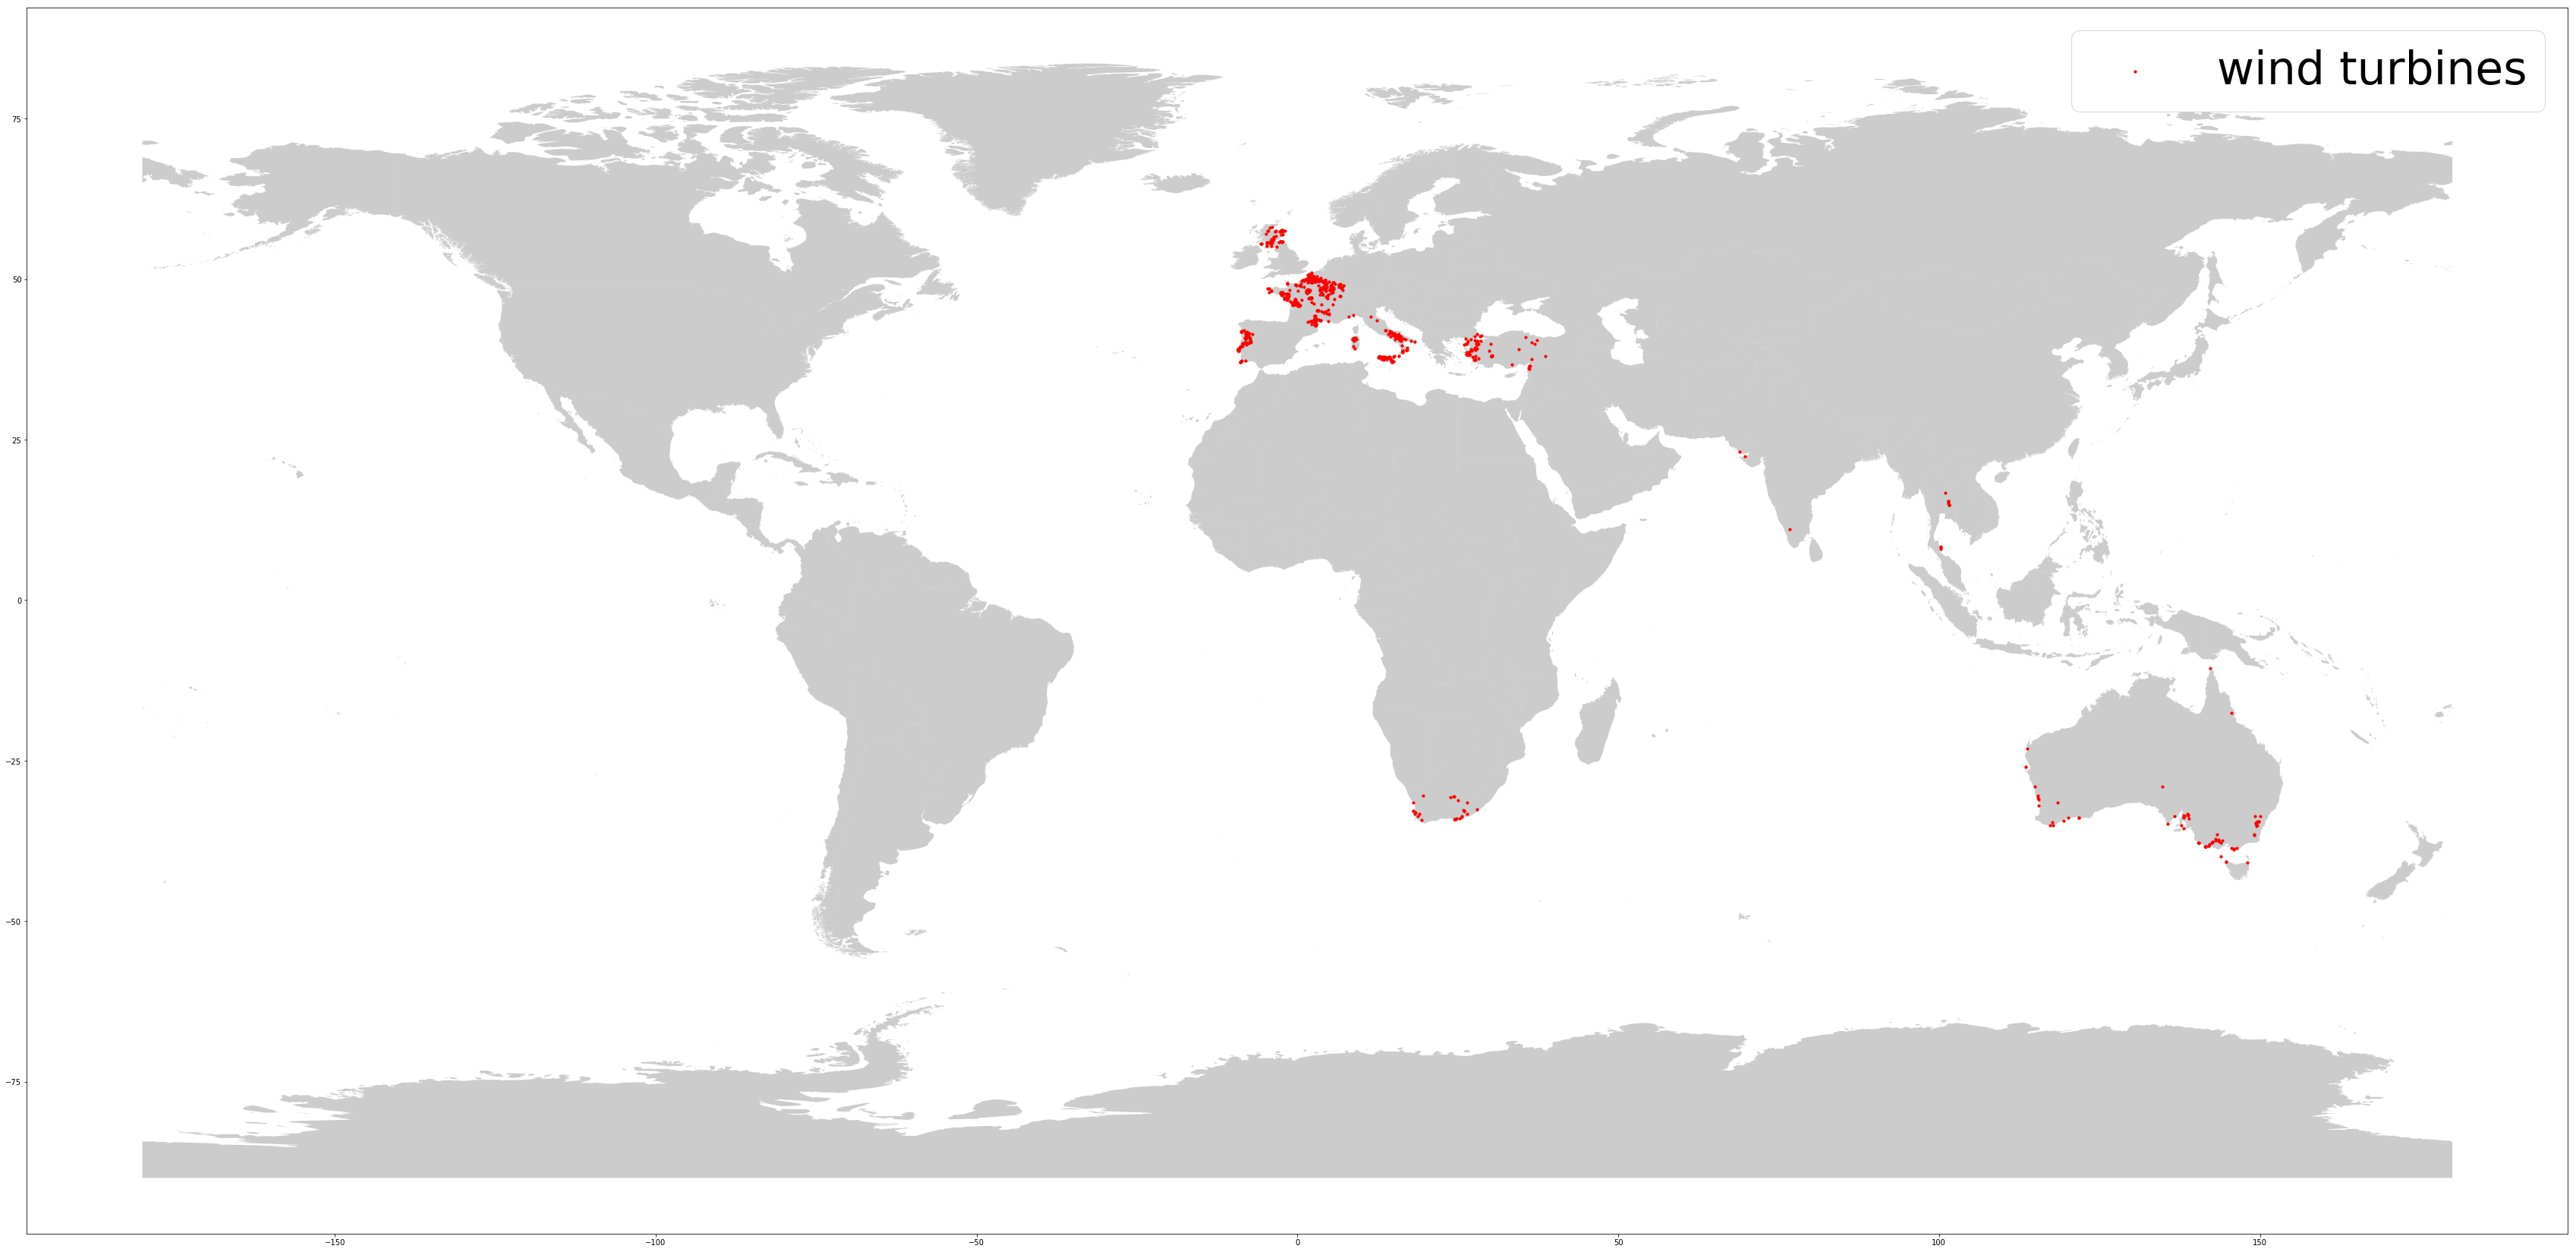

In [37]:
#plot wind turnbine data points all around the world
world_map=gpd.read_file('/Users/billyzhaoyh/Desktop/fourth_year_project/country/ne_10m_admin_0_countries.shp')
geometry=[Point(xy) for xy in zip(Long1,Lat1)]
geometry[:3]
crs = {'init':'epsg:4326'}
geo_df=gpd.GeoDataFrame(df_1,crs=crs,geometry=geometry)
fig,ax=plt.subplots(figsize=(60,60))
world_map.plot(ax=ax,alpha=0.4,color='grey')
geo_df.plot(ax=ax,markersize=10,color='red',marker="o",label="wind turbines")
plt.legend(prop={'size':60})

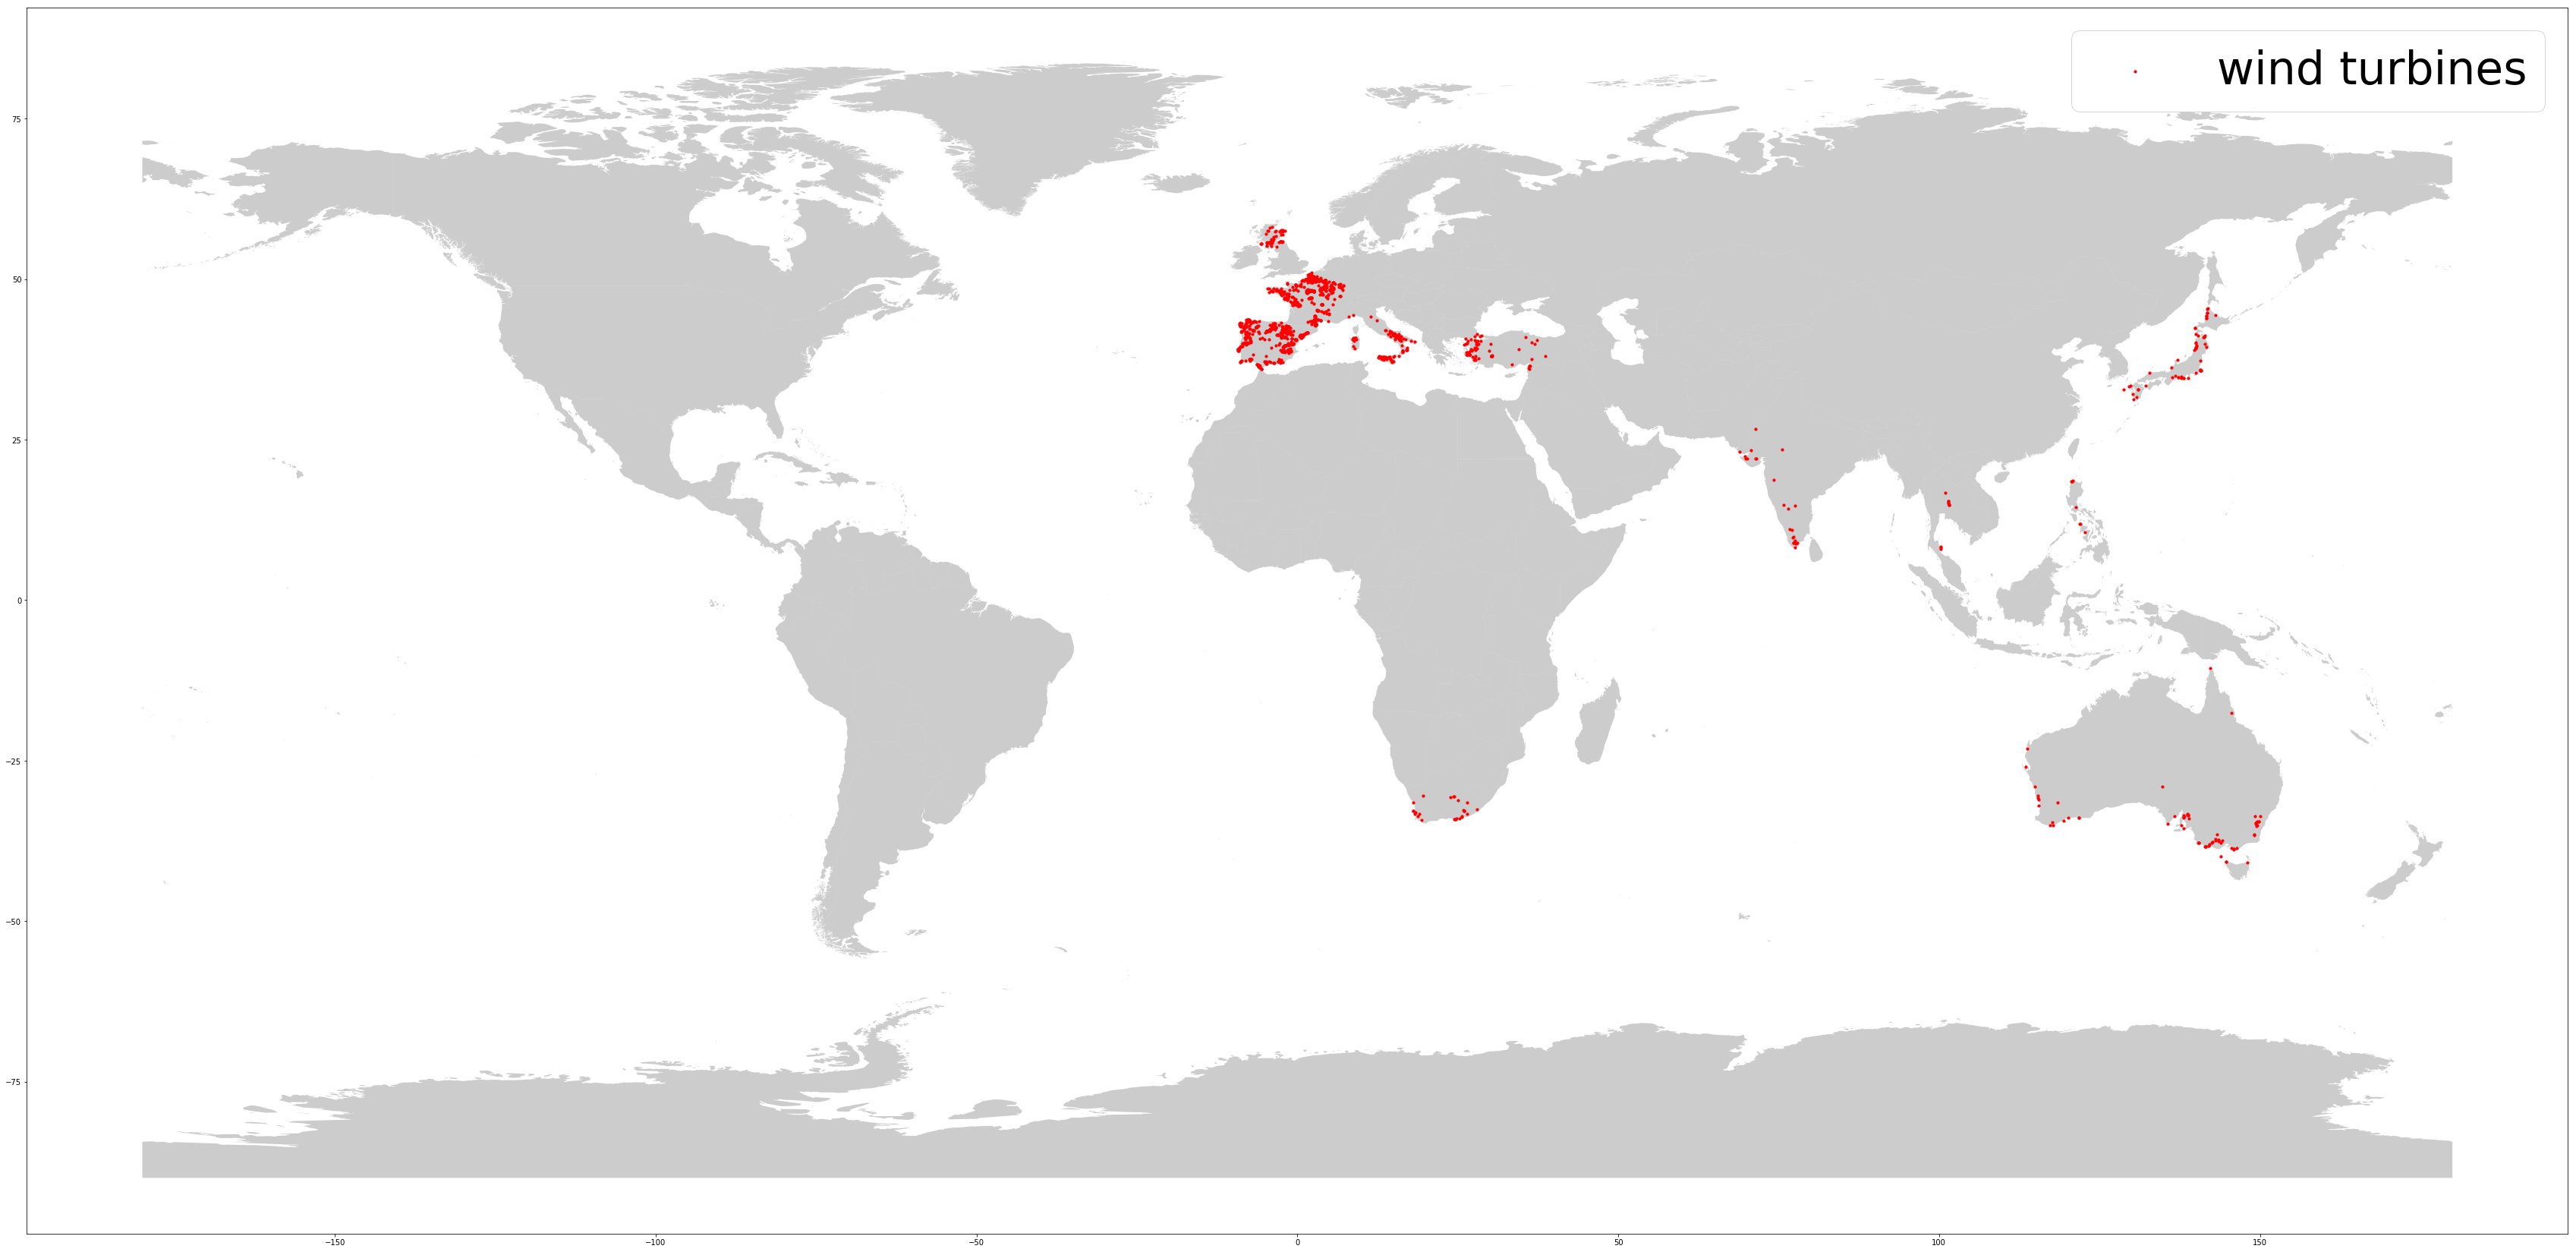

In [38]:
#plot wind turnbine data points all around the world
world_map=gpd.read_file('/Users/billyzhaoyh/Desktop/fourth_year_project/country/ne_10m_admin_0_countries.shp')
geometry=[Point(xy) for xy in zip(Long2,Lat2)]
geometry[:3]
crs = {'init':'epsg:4326'}
geo_df=gpd.GeoDataFrame(df_2,crs=crs,geometry=geometry)
fig,ax=plt.subplots(figsize=(60,60))
world_map.plot(ax=ax,alpha=0.4,color='grey')
geo_df.plot(ax=ax,markersize=10,color='red',marker="o",label="wind turbines")
plt.legend(prop={'size':60})

In [39]:
#For generalised model world wide should adopt strategy 2

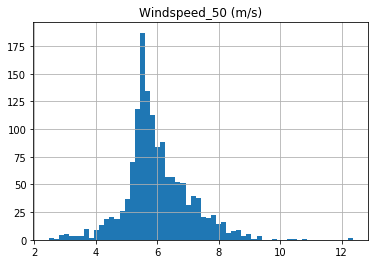

In [43]:
hist = df_2.hist(column='Windspeed_50 (m/s)',bins=60)

In [27]:
from sklearn.preprocessing import QuantileTransformer, quantile_transform
y_trans = quantile_transform(df_2['Windspeed_50 (m/s)'].values.reshape((df_2['Windspeed_50 (m/s)'].values.shape[0], 1)),
                             output_distribution='normal')

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
         2.,  2.,  5.,  6., 10., 13., 19., 26., 33., 43., 52., 63., 72.,
        83., 90., 95., 98., 99., 95., 89., 83., 74., 62., 52., 43., 33.,
        26., 19., 14.,  9.,  7.,  5.,  1.,  3.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-5.19933758e+00, -5.02602633e+00, -4.85271508e+00, -4.67940382e+00,
        -4.50609257e+00, -4.33278132e+00, -4.15947007e+00, -3.98615881e+00,
        -3.81284756e+00, -3.63953631e+00, -3.46622506e+00, -3.29291380e+00,
        -3.11960255e+00, -2.94629130e+00, -2.77298004e+00, -2.59966879e+00,
        -2.42635754e+00, -2.25304629e+00, -2.07973503e+00, -1.90642378e+00,
        -1.73311253e+00, -1.55980127e+00, -1.38649002e+00, -1.21317877e+00,
        -1.03986752e+00, -8.66556264e-01, -6.93245011e-01, -5.19933758e-01,
        -3.46622505e-01, -1.73311253e-01,  4.89217555e-11,  1.73311253e-01,
         3.46622506e-01,  5.19933758e-01,  6.93245

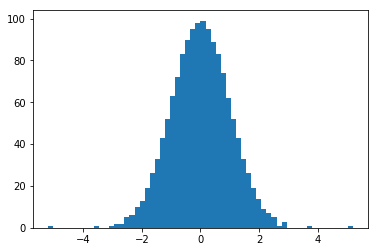

In [52]:
plt.hist(y_trans,bins=60)

In [31]:
from sklearn.compose import TransformedTargetRegressor
regr_trans = TransformedTargetRegressor(
    regressor=linear_model.LinearRegression(),
    transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(features_train,windspeed_train)
y_predict=regr_trans.predict(features_test)
print(np.vstack((y_predict, windspeed_test)).T)
final_error=-np.sum(np.square(y_predict-windspeed_test))/len(windspeed_test)
print('mse error on test set is {}.'.format(final_error))
#does not imporve performance on first and second dataset


[[ 6.30222305  6.97679714]
 [ 5.85603461  5.93862167]
 [ 6.14989348  6.22131418]
 [ 6.69041483  6.009295  ]
 [ 6.12015243  5.99021636]
 [ 5.89605934  7.30061   ]
 [ 6.7513452   6.69255733]
 [ 7.17005128  7.080218  ]
 [ 5.77780125  5.43316333]
 [ 5.89546219  5.779122  ]
 [ 5.45817673  5.253154  ]
 [ 5.46461466  5.45415889]
 [ 5.72188596  5.90697   ]
 [ 7.2371532   5.64111   ]
 [ 5.4642458   5.5147825 ]
 [ 6.01886161  5.567038  ]
 [ 5.81275174  5.345195  ]
 [ 5.63997525  5.438404  ]
 [ 5.57733188  5.51937286]
 [ 5.48768588  5.18090417]
 [ 6.4583075   6.60631   ]
 [ 5.45686815  5.45203222]
 [ 5.43621852  5.00468333]
 [ 5.86532525  6.24048077]
 [ 5.71595003  6.1938925 ]
 [ 5.54185159  5.37607857]
 [ 5.54179108  5.728848  ]
 [ 7.09277306  8.383225  ]
 [ 5.45739676  5.001444  ]
 [ 7.31849296 12.36293583]
 [ 5.52523756  5.64814375]
 [ 7.44802944  7.8923    ]
 [ 5.86607895  5.45593   ]
 [ 5.74255671  6.21301   ]
 [ 5.52177974  5.84537077]
 [ 5.71193844  5.866405  ]
 [ 5.76817932  5.662542  ]
 

In [32]:
#need to build models for both to consider which dataset to use